In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [29]:
data = mnist.load_data()

In [30]:
((X_train, y_train), (X_test, y_test)) = data

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


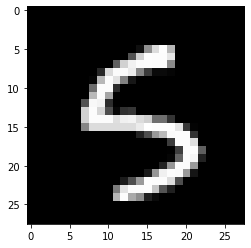

In [32]:
plt.imshow(X_train[15000], cmap= 'gray')

In [33]:
y_train[15000]

5

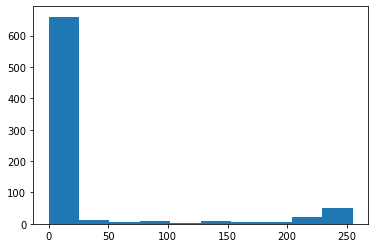

In [34]:
plt.hist(X_train[15000].reshape(-1))
plt.show()

### 데이터셋준비

#### 1. X데이터가 현재 2차원으로 되어있다. (28, 28) --> 1차원으로 펴줘야 한다

In [35]:
X_train_reshape = X_train.reshape(60000, -1)
X_test_reshape = X_test.reshape(10000, -1)

#### 정답 데이터(0 - 9)

In [36]:
import numpy as np
import pandas as pd

In [37]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [39]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [70]:
import numpy as np
import tensorflow

np.random.seed(0)
tensorflow.random.set_seed(0)

#### 모델 생성
- input_dim : 입력하는 데이터 모양을 고려
- 출력층의 퍼셉트론 개수

In [121]:
# 1. 모델 구조 생성
model = Sequential()
model.add(Dense(256 ,input_dim =  784, activation='relu')) # 사진 갯수 784

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_101 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_102 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_103 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_104 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_105 (Dense)            (None, 10)                170       
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
_______________________________________________

In [122]:
# 2. 모델 학습 방법 / 평가 방법
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics =['accuracy'] )

In [123]:
#model.fit(X_train_reshape, y_train_one_hot, epochs = 100, validation_split = 0.2 ) 
# 0.2 퍼센트 데이터를 검증용으로 사용

In [124]:
history = model.fit(X_train_reshape, y_train_one_hot, epochs = 2000, validation_split = 0.2, callbacks=[mc, et] ) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/2000
47136/48000 [============================>.] - ETA: 0s - loss: 0.8913 - accuracy: 0.8194
Epoch 00001: val_accuracy improved from 0.10600 to 0.91783, saving model to .\model\mnist_001-0.9178.hd5
INFO:tensorflow:Assets written to: .\model\mnist_001-0.9178.hd5\assets
48000/48000 [==============================] - 5s 95us/sample - loss: 0.8806 - accuracy: 0.8213 - val_loss: 0.3329 - val_accuracy: 0.9178
Epoch 2/2000
47200/48000 [============================>.] - ETA: 0s - loss: 0.2379 - accuracy: 0.9366
Epoch 00002: val_accuracy improved from 0.91783 to 0.93633, saving model to .\model\mnist_002-0.9363.hd5
INFO:tensorflow:Assets written to: .\model\mnist_002-0.9363.hd5\assets
48000/48000 [==============================] - 4s 81us/sample - loss: 0.2364 - accuracy: 0.9369 - val_loss: 0.2353 - val_accuracy: 0.9363
Epoch 3/2000
47296/48000 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.9520
Epoch 00003: val

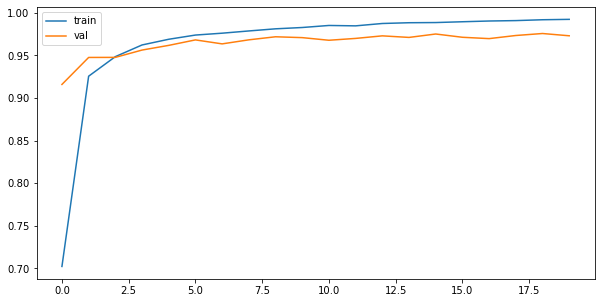

In [114]:
plt.figure(figsize=(10,5)) #가로,세로
plt.plot(history.history['accuracy'], label = 'train') # 훈련용 데이터로 평가한 점수
plt.plot(history.history['val_accuracy'], label= 'val') # 검증용 데이터로 평가한 점수
plt.legend()
plt.show()

In [103]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.1495 - accuracy: 0.9760


[0.1495285255536608, 0.976]

In [125]:
model2 = Sequential()

model2.add(Dense(128, input_dim =  784, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))

model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_107 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_108 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_109 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_111 (Dense)            (None, 10)                90        
Total params: 111,570
Trainable params: 111,570
Non-trainable params: 0
_______________________________________________

In [126]:
model2.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics =['accuracy'] )
history2 = model2.fit(X_train_reshape, y_train_one_hot, epochs = 2000, validation_split = 0.2, callbacks=[mc, et] ) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/2000
47488/48000 [============================>.] - ETA: 0s - loss: 1.6089 - accuracy: 0.4162
Epoch 00001: val_accuracy did not improve from 0.97408
48000/48000 [==============================] - 3s 67us/sample - loss: 1.6042 - accuracy: 0.4177 - val_loss: 1.2541 - val_accuracy: 0.5503
Epoch 2/2000
47968/48000 [============================>.] - ETA: 0s - loss: 0.9229 - accuracy: 0.7048
Epoch 00002: val_accuracy did not improve from 0.97408
48000/48000 [==============================] - 3s 59us/sample - loss: 0.9230 - accuracy: 0.7049 - val_loss: 0.5371 - val_accuracy: 0.8943
Epoch 3/2000
47552/48000 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.9114
Epoch 00003: val_accuracy did not improve from 0.97408
48000/48000 [==============================] - 3s 61us/sample - loss: 0.4060 - accuracy: 0.9116 - val_loss: 0.2487 - val_accuracy: 0.9376
Epoch 4/2000
47264/48000 [============================>.] - ETA: 

In [127]:
model2.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.1456 - accuracy: 0.9759


[0.14559464308924508, 0.9759]

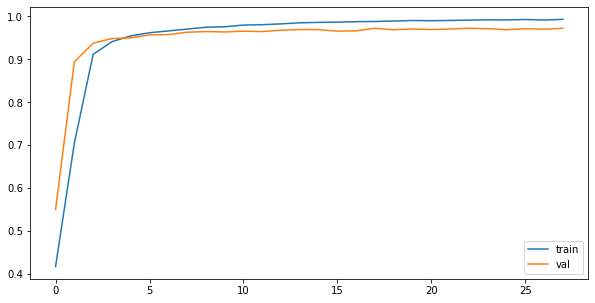

In [128]:
plt.figure(figsize=(10,5)) #가로,세로
plt.plot(history2.history['accuracy'], label = 'train') # 훈련용 데이터로 평가한 점수
plt.plot(history2.history['val_accuracy'], label= 'val') # 검증용 데이터로 평가한 점수
plt.legend()
plt.show()

In [48]:
import os 
model_dir = '.\\model\\'
#폴더 없으면 생성
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

In [49]:
#모델 저장
path = model_dir + "mnist_model01.hd5"
model.save(path)

INFO:tensorflow:Assets written to: .\model\mnist_model01.hd5\assets


In [50]:
#기본 모델 삭제
del model

In [52]:
#모델 불러오기
from tensorflow.keras.models import load_model

model = load_model(path)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
Total params: 7,995
Trainable params: 7,995
Non-trainable params: 0
_________________________________________________________________


### 베스트 모델 저장

In [ ]:
import os
# 베스트 모델을 찾아 저장!
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_dir = '.\\model\\'

if not os.path.exists(best_model_dir) :
    os.mkdir(best_model_dir)
    
#001-70.2246.hd5
best_model_path = best_model_dir + "mnist_{epoch:03d}-{val_accuracy:.4f}.hd5"

#filepath : 베스트 모델을 저장할 경로
# monitor : 베스트 모델을 찾을 기준
# save_best_only : 베스트 모델만 저장
#  verbose : 실행 과정을 출력 ( 0 : 출력 x)

### 학습 중단 기준

In [116]:
#학습이 더 이상 나아지지 않으면 학습 중단,.

from tensorflow.keras.callbacks import EarlyStopping


mc = ModelCheckpoint(filepath=best_model_path,
                    monitor="val_accuracy",
                     save_best_only=True,
                     verbose = 1  )

#monitor = 중지 기준
#patience : 학습이 나아지지 않더라도 진행하는 반복 회수
et = EarlyStopping(monitor = "val_accuracy", 
                   patience = 5)

In [115]:
# 베스트 모델 불러오기

from tensorflow.keras.models import load_model

path2 = best_model_dir + "mnist_017-0.9764.hd5"

model = load_model(path2)

In [109]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.1207 - accuracy: 0.9776


[0.12070450595988332, 0.9776]